In [1]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# House price Prediction --> Case Study --> Regression --> Build API (Webservice --> Flask)
from sklearn.datasets import load_boston

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [5]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# print(load_boston())

In [12]:
# let'sunderstand the data
d = load_boston()
print(type(d))
print(d.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [11]:
d.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
print(d.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
# creating a dataframe to map independent variable(s) and 
# dependent variable
boston_data = pd.DataFrame(d.data,columns=d.feature_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
# alignt the target to our dataframe
boston_data['Price'] = d.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [20]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


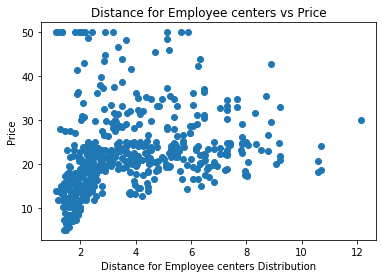

In [25]:
# visualization to get better insights
plt.scatter(boston_data['DIS'],boston_data['Price'])
plt.xlabel("Distance for Employee centers Distribution")
plt.ylabel('Price')
plt.title('Distance for Employee centers vs Price')
plt.show()

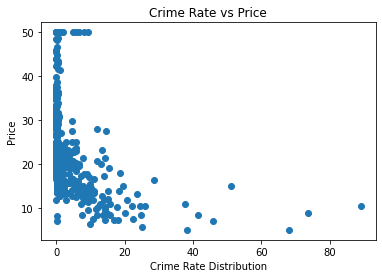

In [22]:
plt.scatter(boston_data['CRIM'],boston_data['Price'])
plt.xlabel("Crime Rate Distribution")
plt.ylabel('Price')
plt.title('Crime Rate vs Price')
plt.show()

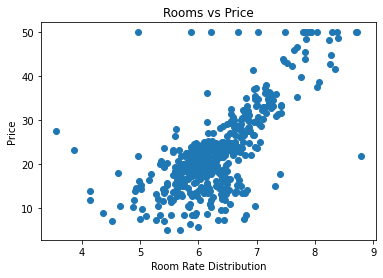

In [26]:
plt.scatter(boston_data['RM'],boston_data['Price'])
plt.xlabel("Room Rate Distribution")
plt.ylabel('Price')
plt.title('Rooms vs Price')
plt.show()

In [27]:
# Check the correlation with the features
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [29]:
boston_data.corr().round(2) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [30]:
# Split the data into traning/testing
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.linear_model import LinearRegression

In [35]:
# divide the data into dependent and independent variable(s)
x = boston_data.iloc[:,:-1]
y = boston_data.iloc[:,-1]
#print(x)
#print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [38]:
x_train.shape;
x_test.shape

(152, 13)

In [39]:
# building the model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [40]:
# Create a table showing the coefficient (influence)
# of each of the columns
cdf = pd.DataFrame(lin_reg.coef_,
                  index = x_train.columns,
                  columns = ['Coefficients'])
cdf

,Coefficients
CRIM,-0.098542
ZN,0.060784
INDUS,0.059172
CHAS,2.439560
NOX,-21.469965
RM,2.795814
AGE,0.003575
DIS,-1.516272
RAD,0.307542
TAX,-0.011280


In [41]:
# FeatureScaling is to be done to make every column satndard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [46]:
#print(x_train);
#print(x_test)

In [47]:
# once input features are scaled let's check the coefficients also
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# x_train

In [49]:
cdf = pd.DataFrame(lin_reg.coef_,index=d.feature_names,columns=['Coefficients'])
cdf

,Coefficients
CRIM,-0.838843
ZN,1.428401
INDUS,0.405327
CHAS,0.679425
NOX,-2.530391
RM,1.933816
AGE,0.100907
DIS,-3.236154
RAD,2.703183
TAX,-1.917299


In [50]:
# Then we go for prediction and calculate the metrics
reg_predict = lin_reg.predict(x_test)

In [51]:
# R-Squared value --> Coefficient of Determination
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,reg_predict))
print(r2_score(y_test,reg_predict)*100)

20.0185102012852
78.15872322862856


In [52]:
# Go for predictions by passing our input
x.iloc[0];y[0]

24.0

In [53]:
# let's check what our model has given
lin_reg.predict(x.iloc[[0]])

array([-333.60545902])

In [54]:
# For sure target will be -ve as feature scaling to be done
# As you can observe price is -ve we need to scale it 
scaled = lin_reg.predict(scaler.transform(x.iloc[[0]]))
scaled

array([29.04339119])

In [55]:
# once we are confident enough to test the model in production-ready environment
# will save the models using pickle
import pickle

In [56]:
# we will create pickle files for both regressionmodel and scaling model
# open() is generally for File modes
pickle.dump(lin_reg,open('regmodel.pkl','wb'))

In [57]:
# same way we create another pickle file for scaling model
pickle.dump(scaler,open('scaler.pkl','wb'))

In [58]:
# now let's give some validation data and test on pickle files
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [59]:
# do same for transformation
f = pickle.load(open('scaler.pkl','rb'))

In [60]:
# as we have successfully loaded the picklefile will pass data
pickle_model.predict(f.transform(x.iloc[[0]]))

array([29.04339119])